<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas-2022/blob/main/OLS_2_Ajuste_Propiedades_Test_de_Hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('https://github.com/rpasquini/herramientas-econometricas/blob/main/datos/eah2016_individual.csv?raw=true')

In [3]:
df.head(10)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,s8,sn14,sn16,s28,s29,fexp,sexotexto,inmigrante,logingreso,dsex
0,1,1,1,13,resto ciudad,18,mujer,1,6,95,...,2,0,Excelente,2,0,973,mujer,nativo arg,8.384804,1
1,2,1,1,1,resto ciudad,18,varon,1,6,95,...,2,0,Excelente,0,0,115,varon,inmigrante,9.104980,0
2,3,1,1,6,inquilinatos hoteles inmuebles tomados,18,mujer,1,6,95,...,2,0,Excelente,2,0,223,mujer,inmigrante,8.482602,1
3,4,1,1,14,resto ciudad,18,varon,1,6,95,...,2,0,Excelente,0,0,421,varon,nativo arg,9.615806,0
4,5,1,1,2,resto ciudad,18,varon,1,6,95,...,2,0,Bueno,0,0,199,varon,nativo arg,9.615806,0
5,6,1,1,13,resto ciudad,18,mujer,1,6,95,...,2,0,Bueno,2,0,314,mujer,nativo arg,8.612503,1
6,6,1,2,13,resto ciudad,24,varon,7,6,95,...,2,0,Excelente,0,0,314,varon,nativo arg,9.798127,0
7,7,1,1,7,resto ciudad,18,mujer,1,3,95,...,2,0,Bueno,1,2,272,mujer,nativo arg,7.901007,1
8,7,1,2,7,resto ciudad,2,varon,3,0,95,...,2,0,Excelente,0,0,272,varon,nativo arg,NaN,0
9,7,1,3,7,resto ciudad,1,varon,3,0,95,...,2,0,Excelente,0,0,272,varon,nativo arg,NaN,0


In [4]:
df.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentes_2', 'p5_2', 'p6_a', 'p6_b', 'estado', 'categori', 't13',
       't14', 't18', 't28', 't29', 't29a', 't30', 'sem_hs', 't33', 't34',
       't35', 't37_cod_2', 't37_coda_2', 't38', 't39', 't40', 't41_cod_2',
       't47', 't48', 't51_bis', 'i1', 'i4', 'i6_3', 'i10', 'i11', 'codioph',
       'ioph_2', 'codioph_neto', 'ioph_neto_2', 'codios', 'ios_2', 'codioa',
       'ioa_2', 'codlab', 'inglab_2', 'codi3_1x', 'i3_1x_2', 'codi3_2x',
       'i3_2x_2', 'codi3_8x', 'i3_8x_2', 'codi3_est', 'i3_est_2', 'codi3_otr',
       'i3_otr_2', 'codnolab', 'ingnolab_2', 'coding', 'ingtot_2', 'codi_tot',
       'itfb_2', 'ipcfb_2', 'e2', 'e4', 'e6', 'e8', 'e12', 'e13', 'e14',
       'edad_30', 'nivel', 'aesc', 'm1', 'm1_2', 'm2_anio', 'm3_anio',
       'tipcob2_2', 'sn1_1', 'sn1_7', 'sn1_2', 'sn1_3', 'sn1_4', 'sn1_5', 's8',
       'sn14', 'sn16', 's28', 's29', 'fexp', 'sexotexto', 'inmigrante',
       'logingreso', 'dse

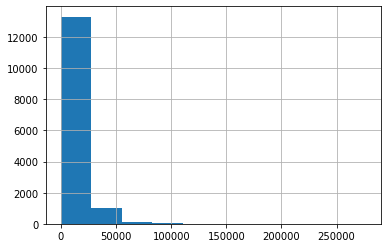

In [5]:
df['ingtot_2'].hist()

In [6]:
df['ingtot_2'].describe()

count     14512.000000
mean      10386.681850
std       13396.598595
min           0.000000
25%           0.000000
50%        7000.000000
75%       15000.000000
max      276000.000000
Name: ingtot_2, dtype: float64

$ingtot=\beta_0+\beta_1 aesc +\epsilon$

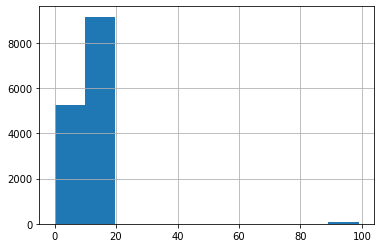

In [7]:
df['aesc'].hist()

In [8]:
df=df.loc[df['aesc']!=99]

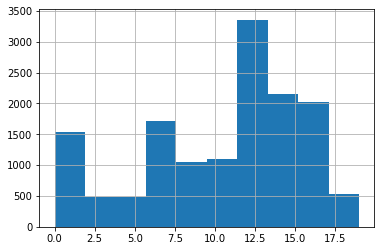

In [9]:
df['aesc'].hist()

In [10]:
def regress(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [11]:
misresultados=regress(['ingtot_2','aesc'],data=df)

                            OLS Regression Results                            
Dep. Variable:               ingtot_2   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     5048.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:58:10   Log-Likelihood:            -1.5567e+05
No. Observations:               14450   AIC:                         3.113e+05
Df Residuals:                   14448   BIC:                         3.114e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3138.4311    213.503    -14.700      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
prediccion_ingreso=misresultados.predict()

In [13]:
residuos_estimados=df['ingtot_2']-prediccion_ingreso

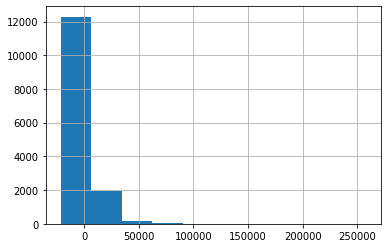

In [14]:
residuos_estimados.hist()

In [15]:
df=df.loc[df['ingtot_2']>0]

In [16]:
df['logingreso']=np.log(df['ingtot_2'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df['logingreso'].describe()

count    10082.000000
mean         9.283468
std          0.860776
min          3.178054
25%          8.699515
50%          9.375855
75%          9.862666
max         12.528156
Name: logingreso, dtype: float64

In [18]:
misresultados2=regress(['logingreso','aesc'],df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2507.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:58:10   Log-Likelihood:                -11674.
No. Observations:               10082   AIC:                         2.335e+04
Df Residuals:                   10080   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0118      0.027    301.990      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
residuos_pred=df['logingreso']-misresultados2.predict()

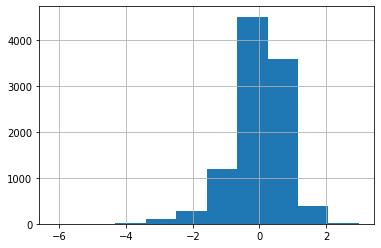

In [20]:
residuos_pred.hist()

In [21]:
misresultados2.mse_resid

0.5933966058835762

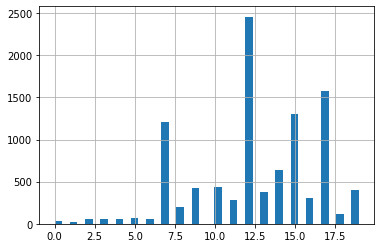

In [22]:
df.aesc.hist(bins=40)

In [23]:
def regress(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [24]:
resultados=regress(['logingreso','aesc'],data=df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2507.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:58:10   Log-Likelihood:                -11674.
No. Observations:               10082   AIC:                         2.335e+04
Df Residuals:                   10080   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0118      0.027    301.990      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
resultados.params['aesc']

0.10108264507335257

In [26]:
resultados.predict()

array([9.22474507, 9.22474507, 9.22474507, ..., 8.41608391, 9.22474507,
       9.12366242])

# Predicción

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [27]:
# 10 años de escolaridad
8.0118+0.1011*10

9.022799999999998

In [28]:
# 10 años de escolaridad levantando los parametros de los resultados del ajuste
resultados.params['const']+resultados.params['aesc']*10

9.02257977872712

In [29]:
# Predicciones para observaciones en la data
resultados.params['const']+resultados.params['aesc']*df.aesc

0        9.224745
1        9.224745
2        9.224745
3        9.224745
4        9.224745
           ...   
14507    8.820414
14508    9.527993
14509    8.416084
14510    9.224745
14511    9.123662
Name: aesc, Length: 10082, dtype: float64

In [30]:
resultados.predict()

array([9.22474507, 9.22474507, 9.22474507, ..., 8.41608391, 9.22474507,
       9.12366242])

In [31]:
df.logingreso-resultados.predict()

0       -0.839941
1       -0.119765
2       -0.742143
3        0.391060
4        0.391060
           ...   
14507   -0.072110
14508    0.424285
14509    0.794256
14510   -0.302087
14511    0.066475
Name: logingreso, Length: 10082, dtype: float64

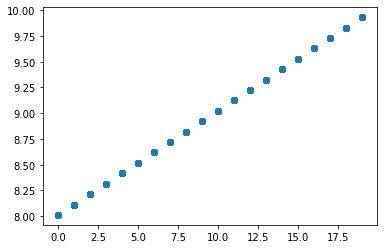

In [32]:
# Ploteamos prediccion con matplolib
plt.scatter(df.aesc, resultados.predict())

(0.0, 15.0)

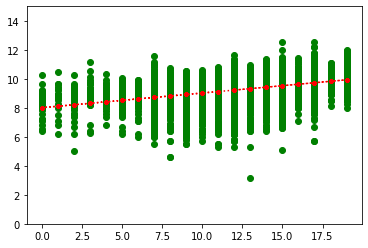

In [33]:
plt.scatter(df.aesc, df.logingreso, color='green')

plt.plot(df.aesc, resultados.predict(), color= "red", marker='.', linestyle=':')

plt.ylim(0,15)


In [34]:
resultados.predict()

array([9.22474507, 9.22474507, 9.22474507, ..., 8.41608391, 9.22474507,
       9.12366242])

# Error Cuadrático Medio


In [35]:
resultados.mse_resid

0.5933966058835762

Error Cuadrático Medio (MSE) a mano

$MSE=\sqrt{\frac{\sum^n_{i=1} e_i^2}{n-2}}$ donde

$e=y-\hat{y}$



In [36]:
ypred = resultados.predict()
residuos=df.logingreso-ypred
rss=np.sum(residuos**2)
MSE=(rss/(resultados.nobs-2))
MSE

0.5933966058835762

In [37]:
MSE**0.5

0.7703224038567074

In [38]:
residuos2=residuos*residuos
residuos2.describe()

count    1.008200e+04
mean     5.932789e-01
std      1.280786e+00
min      7.095860e-10
25%      3.775541e-02
50%      1.961222e-01
75%      5.991575e-01
max      3.779512e+01
Name: logingreso, dtype: float64

In [39]:
residuos.describe()

count    1.008200e+04
mean     5.851300e-15
std      7.702842e-01
min     -6.147774e+00
25%     -3.715083e-01
50%      8.090548e-02
75%      4.910085e-01
max      2.984093e+00
Name: logingreso, dtype: float64

# Propiedades de los estimadores cuando los errores son normales

¿Cuál es el beta que espero obtener si los errores de nuestro fueran errores normales?
Simulamos las estimaciones de los coeficientes beta en presencia de errores normales  



(array([  10.,   66.,  483., 1559., 2818., 2911., 1659.,  473.,   94.,
           9.]),
 array([-2.38791611, -1.9142671 , -1.44061809, -0.96696907, -0.49332006,
        -0.01967105,  0.45397796,  0.92762698,  1.40127599,  1.874925  ,
         2.34857401]),
 <a list of 10 Patch objects>)

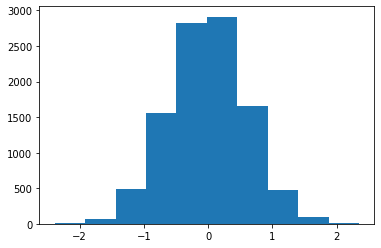

In [40]:
e_simu= np.random.normal(0,0.6,10082)
plt.hist(e_simu)


In [41]:
def simu():
  e_simu = np.random.normal(0,0.6,10082)
  X=df.aesc
  y_simu=resultados.params['const']+resultados.params['aesc']*X+e_simu
  model_simu=sm.OLS(y_simu,X)
  resultados_simu=model_simu.fit()
  #print(resultados_simu.summary())
  #print(resultados_simu.params['bedrooms'])
  return resultados_simu.params['aesc']
simu()

0.6852662048416036

In [42]:
betacoefs=[]
for i in range(0,2000):
  beta=simu()
  betacoefs.append(beta)
print(betacoefs)


[0.6852997135071851, 0.6853335658696862, 0.6845268738009129, 0.6847336292418282, 0.6839347035962586, 0.6848599803399882, 0.6850070561655137, 0.6845824611363716, 0.6852260715997831, 0.6847211079609545, 0.6850049304861403, 0.6846763004174307, 0.6843938107973168, 0.6844906827634272, 0.684764697554376, 0.6844238530711838, 0.6852683089059949, 0.685251394941561, 0.6847860663418124, 0.6842884197225807, 0.6852389565017978, 0.6843739990696911, 0.6854757298553084, 0.6848560315083382, 0.6841110891751747, 0.68481811155807, 0.6843678732228737, 0.6847536144148123, 0.6845439936463804, 0.6846508130098552, 0.6853781698570518, 0.6851302836679496, 0.6840880745375425, 0.684534235991488, 0.685125320204806, 0.6850495303991866, 0.6843799391510943, 0.6845484467681711, 0.6848475494041482, 0.6845802646289185, 0.6851608800973514, 0.6845836419452294, 0.6845453708312996, 0.6851960855754485, 0.6846492902317343, 0.684541364942021, 0.6839496036123983, 0.6844170727924133, 0.6844875442549654, 0.6843573630013173, 0.6839

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77c8a9db50>]],
      dtype=object)

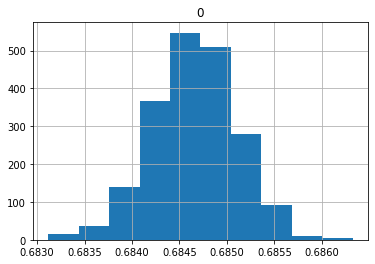

In [43]:
pd.DataFrame(betacoefs).hist()

(array([ 14.,  37., 140., 367., 547., 510., 279.,  91.,  11.,   4.]),
 array([0.68311775, 0.68343852, 0.68375929, 0.68408007, 0.68440084,
        0.68472161, 0.68504239, 0.68536316, 0.68568393, 0.68600471,
        0.68632548]),
 <a list of 10 Patch objects>)

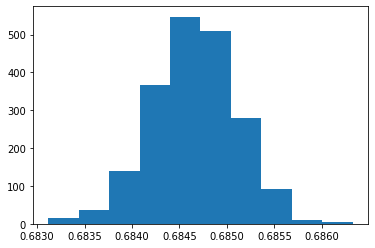

In [44]:
import matplotlib.pyplot as plt
plt.hist(betacoefs)

# Cómo son los residuos (errores estimados) en mis datos?


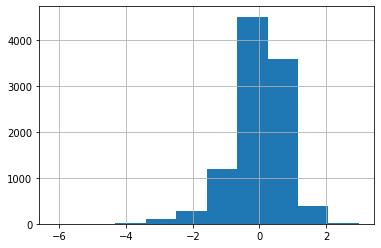

In [45]:
residuos.hist()

# Ajustando el Estimador de Varianzas y Covarianzas

In [68]:
def regress(lista, data, variance="homoskcedastic"):
  """ 
  Funcion que realiza la regresion OLS. Esta version posibilita cambiar la varianza
  lista: La primera variable de la lista es la dependiente, el resto son las explicativas
  data:  Es la base de datos
  variance: Acepta las opciones "White" y "Scaled-White"
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  if variance=="white":
    resultados=modelo.fit(cov_type='HC0')
  elif variance=="scaled-white":
    resultados=modelo.fit(cov_type='HC1')
  elif variance=="macKinnon_and_white":
    resultados=modelo.fit(cov_type='HC2')   
  elif variance=="jacknife":
    resultados=modelo.fit(cov_type='HC3')
  else:
    resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [63]:
regress(['logingreso','aesc'],data=df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2507.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:07:30   Log-Likelihood:                -11674.
No. Observations:               10082   AIC:                         2.335e+04
Df Residuals:                   10080   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0118      0.027    301.990      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [66]:
regress(['logingreso','aesc'],data=df, variance='white')

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2573.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:08:23   Log-Likelihood:                -11674.
No. Observations:               10082   AIC:                         2.335e+04
Df Residuals:                   10080   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0118      0.027    298.103      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
regress(['logingreso','aesc'],data=df, variance='scaled-white')

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2572.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:24:47   Log-Likelihood:                -11674.
No. Observations:               10082   AIC:                         2.335e+04
Df Residuals:                   10080   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0118      0.027    298.073      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
